In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

## PCA

-0.5267952047175124 0.9198708628818013
6.403504699028932 3.961788135345914


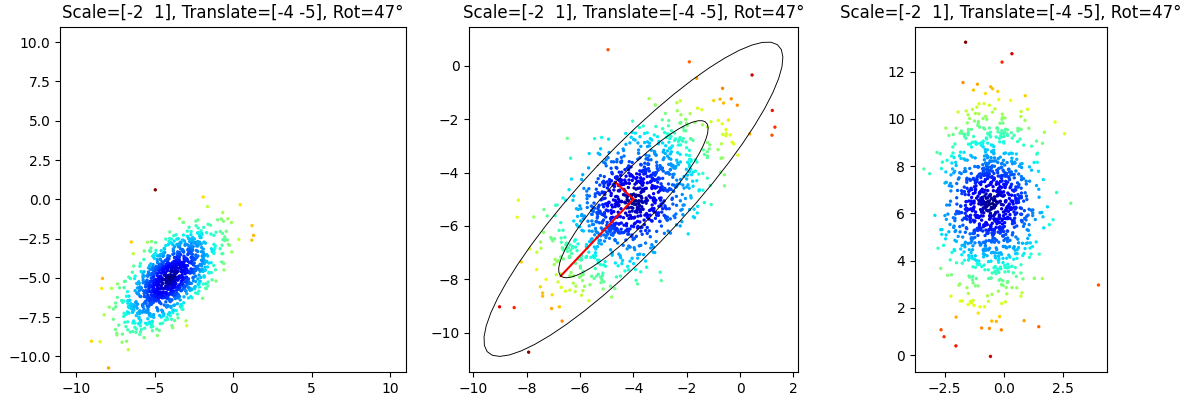

ThetaXº: 136.60  EigenVal%: 18.84   EigenVal:      0.920  EigenVec: [-0.7266107   0.68704941]
ThetaXº:-133.40  EigenVal%: 81.16   EigenVal:      3.962  EigenVec: [-0.68704941 -0.7266107 ]


In [58]:
def distance_to_mean(M):
    # M = x1,y1
    #     x2,y2    
    #     xn,yn
    mean_row = np.mean(M,axis=0)
    return np.sqrt( np.sum((M-mean_row)**2,axis=1) )

def rot_x(theta):
     theta*= np.pi/180
     return np.array([ [ np.cos(theta),np.sin(theta) ],
                       [-np.sin(theta),np.cos(theta) ]])

def plot_eigen_ellip(ax,eigVal, eigVec, txy):

    #plot eigen vectors
    xc,yc = txy
    for eig_val,eigen_vec in zip(eigVal,eigVec.T):
        x = np.array([xc,xc+eig_val*eigen_vec[0]])
        y = np.array([yc,yc+eig_val*eigen_vec[1]])
        ax.plot(x,y,'r')

    # plot variance ellipsoids
    v  = eigVec.T[0]
    te = np.arctan2(v[1],v[0])*180/np.pi
    tt = np.linspace(0,2*np.pi)
    for kr in range(1,2+1):
        xe  = kr*eigVal[0]*np.cos(tt)
        ye  = kr*eigVal[1]*np.sin(tt)
        xye = np.concatenate((xe.reshape(-1,1),ye.reshape(-1,1)),axis=1)
        xye = xye@rot_x(te)+txy
        ax.plot(xye[:,0],xye[:,1],'k',lw=0.65)


def get_rand(a,b,n=2):
    while True:
        r=np.random.randint(a,b,size=n)
        if np.sum(np.argwhere(r==0)+1)==0:
            break
    return r

def PCA(X):

    Mean_row = np.mean(X,axis=0)

    X  = X - Mean_row 
    C  = ( X.T @ X )/N
    eigVal, eigVec = np.linalg.eig(C)

    return eigVal, eigVec 

N     = 1000
theta = np.random.randint(-90,90)
sxy   = get_rand(-5,5)
txy   = get_rand(-5,5)

X0 = np.random.randn(N,2)
S  = np.diag(sxy)
R  = rot_x(theta)
T  = np.ones_like(X0)@np.diag(txy)
X1 = X0 @ S @ R + T

eigVal, eigVec = PCA(X1)

X2=eigVec.T@X1.T

x1=X2[0,:]
x2=X2[1,:]
u1  = np.mean(x1)
u2  = np.mean(x2)
s1  = np.sqrt( np.sum((x1-u1)**2)/N )
s2  = np.sqrt( np.sum((x2-u2)**2)/N )

print(u1,s1**2)
print(u2,s2**2)

fig, ax = plt.subplots(1,3,figsize=(12,4),constrained_layout=True)
cmap    = 'jet' 
max_abs = np.ceil( np.max( [np.max(np.abs(X0)),np.max(np.abs(X1))] ) )
axlm    = [-max_abs,max_abs]
ax[0].scatter(X1[:,0] ,X1[:,1],c=distance_to_mean(X0),s=2, cmap=cmap)
ax[1].scatter(X1[:,0], X1[:,1],c=distance_to_mean(X1),s=2, cmap=cmap)
ax[2].scatter(X2[0,:], X2[1,:],c=distance_to_mean(X1),s=2, cmap=cmap)

plot_eigen_ellip(ax[1],eigVal, eigVec, txy)

title_txt = f'Scale={sxy}, Translate={txy}, Rot={theta}°'
plot_sets(ax[0],gr=False,ar=1,xli=axlm,yli=axlm,ti=title_txt)
plot_sets(ax[1],gr=False,ar=1,                  ti=title_txt)
plot_sets(ax[2],gr=False,ar=1,                  ti=title_txt)
plt.show()

for val,vec in zip(eigVal,eigVec.T):
    p = 100*val/np.sum(eigVal)
    t = np.arctan2(vec[1],vec[0])*180/np.pi
    print(f'ThetaXº:{t:7.2f}  EigenVal%:{p:6.2f}   EigenVal: {val:10.3f}  EigenVec: {vec}')


## Bivariate Normal Distribution

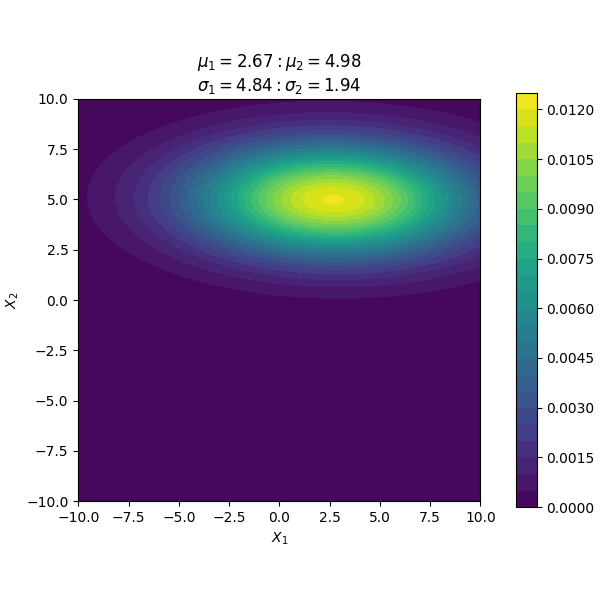

In [60]:
def prob_2D(x1,x2,x1_lims=[-10,10],x2_lims=[-10,10],Nspan=200):
    #ref https://mathworld.wolfram.com/BivariateNormalDistribution.html

    u1  = np.mean(x1)
    u2  = np.mean(x2)
    s1  = np.sqrt( np.sum((x1-u1)**2)/N )
    s2  = np.sqrt( np.sum((x2-u2)**2)/N )
    c12 = np.sum( (x1-u1)*(x2-u2) )/N
    p   = c12/(s1*s2)
    
    x1_span = np.linspace(x1_lims[0],x1_lims[1],Nspan)
    x2_span = np.linspace(x2_lims[0],x2_lims[1],Nspan)
    X1,X2   = np.meshgrid(x1_span,x2_span)
 
    A = 1/(2**np.pi*s1*s2*np.sqrt(1-p**2))

    B = ( ((X1-u1)**2)/s1**2 - (2*p*(X1-u1)*(X2-u2))/(s1*s2) + (X2-u2)**2/s2**2)

    P = A*np.exp(-B/(2*(1-p**2)))

    return X1,X2,P,dict(u1=u1,u2=u2,s1=s1,s2=s2,c12=c12,p=p)

N   = 1000
x1  = np.random.randn(N)*5 + 2.5
x2  = np.random.randn(N)*2 + 5

X1,X2,P,data = prob_2D(x1,x2,x1_lims=[-10,10],x2_lims=[-10,10]) 

fig, ax = plt.subplots(1,1,figsize=(6,6),constrained_layout=True)

con = ax.contourf(X1,X2,P,25)
fig.colorbar(con, ax=ax, shrink=0.7)

plot_sets(ax,gr=False,ar=1,xla='$X_1$',yla='$X_2$',ti=f"$\\mu_1={data["u1"]:0.3} : \\mu_2={data["u2"]:0.3}$\n$\\sigma_1={data["s1"]:0.3} : \\sigma_2={data["s2"]:0.3}$")

plt.show()